In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"https://raw.githubusercontent.com/pb2894/Assignment-DS/refs/heads/main/Titanic_test.csv")
df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [3]:
df.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [4]:
df.drop(columns = ['Name','Ticket','Cabin'], inplace = True)
df

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...,...
413,1305,3,male,NaN,0,0,8.0500,S
414,1306,1,female,39.0,0,0,108.9000,C
415,1307,3,male,38.5,0,0,7.2500,S
416,1308,3,male,NaN,0,0,8.0500,S


In [5]:
df.describe() 

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


## Data Transformation

In [6]:
df = pd.get_dummies(data=df, columns= ['Sex'], dtype=int)
df

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex_female,Sex_male
0,892,3,34.5,0,0,7.8292,Q,0,1
1,893,3,47.0,1,0,7.0000,S,1,0
2,894,2,62.0,0,0,9.6875,Q,0,1
3,895,3,27.0,0,0,8.6625,S,0,1
4,896,3,22.0,1,1,12.2875,S,1,0
...,...,...,...,...,...,...,...,...,...
413,1305,3,NaN,0,0,8.0500,S,0,1
414,1306,1,39.0,0,0,108.9000,C,1,0
415,1307,3,38.5,0,0,7.2500,S,0,1
416,1308,3,NaN,0,0,8.0500,S,0,1


In [7]:
df.isna().sum()  

PassengerId     0
Pclass          0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked        0
Sex_female      0
Sex_male        0
dtype: int64

In [8]:
for i in df.isna().sum():
    print((i/len(df))*100)

0.0
0.0
20.574162679425836
0.0
0.0
0.23923444976076555
0.0
0.0
0.0


In [9]:
Age_median = df['Age'].median()
Age_median

27.0

In [10]:
df['Age'].fillna(Age_median, inplace=True)

In [11]:
df.isna().sum()

PassengerId    0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           1
Embarked       0
Sex_female     0
Sex_male       0
dtype: int64

In [12]:
Embarked_mode = df['Embarked'].mode()
Embarked_mode

0    S
Name: Embarked, dtype: object

In [13]:
df['Embarked'].fillna(Embarked_mode, inplace=True)

In [14]:
df.isna().sum()

PassengerId    0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           1
Embarked       0
Sex_female     0
Sex_male       0
dtype: int64

In [15]:
Fare_median = df['Age'].median()
Fare_median

27.0

In [16]:
df['Fare'].fillna(Fare_median, inplace=True)

In [17]:
df.isna().sum()

PassengerId    0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
Sex_female     0
Sex_male       0
dtype: int64

<Axes: >

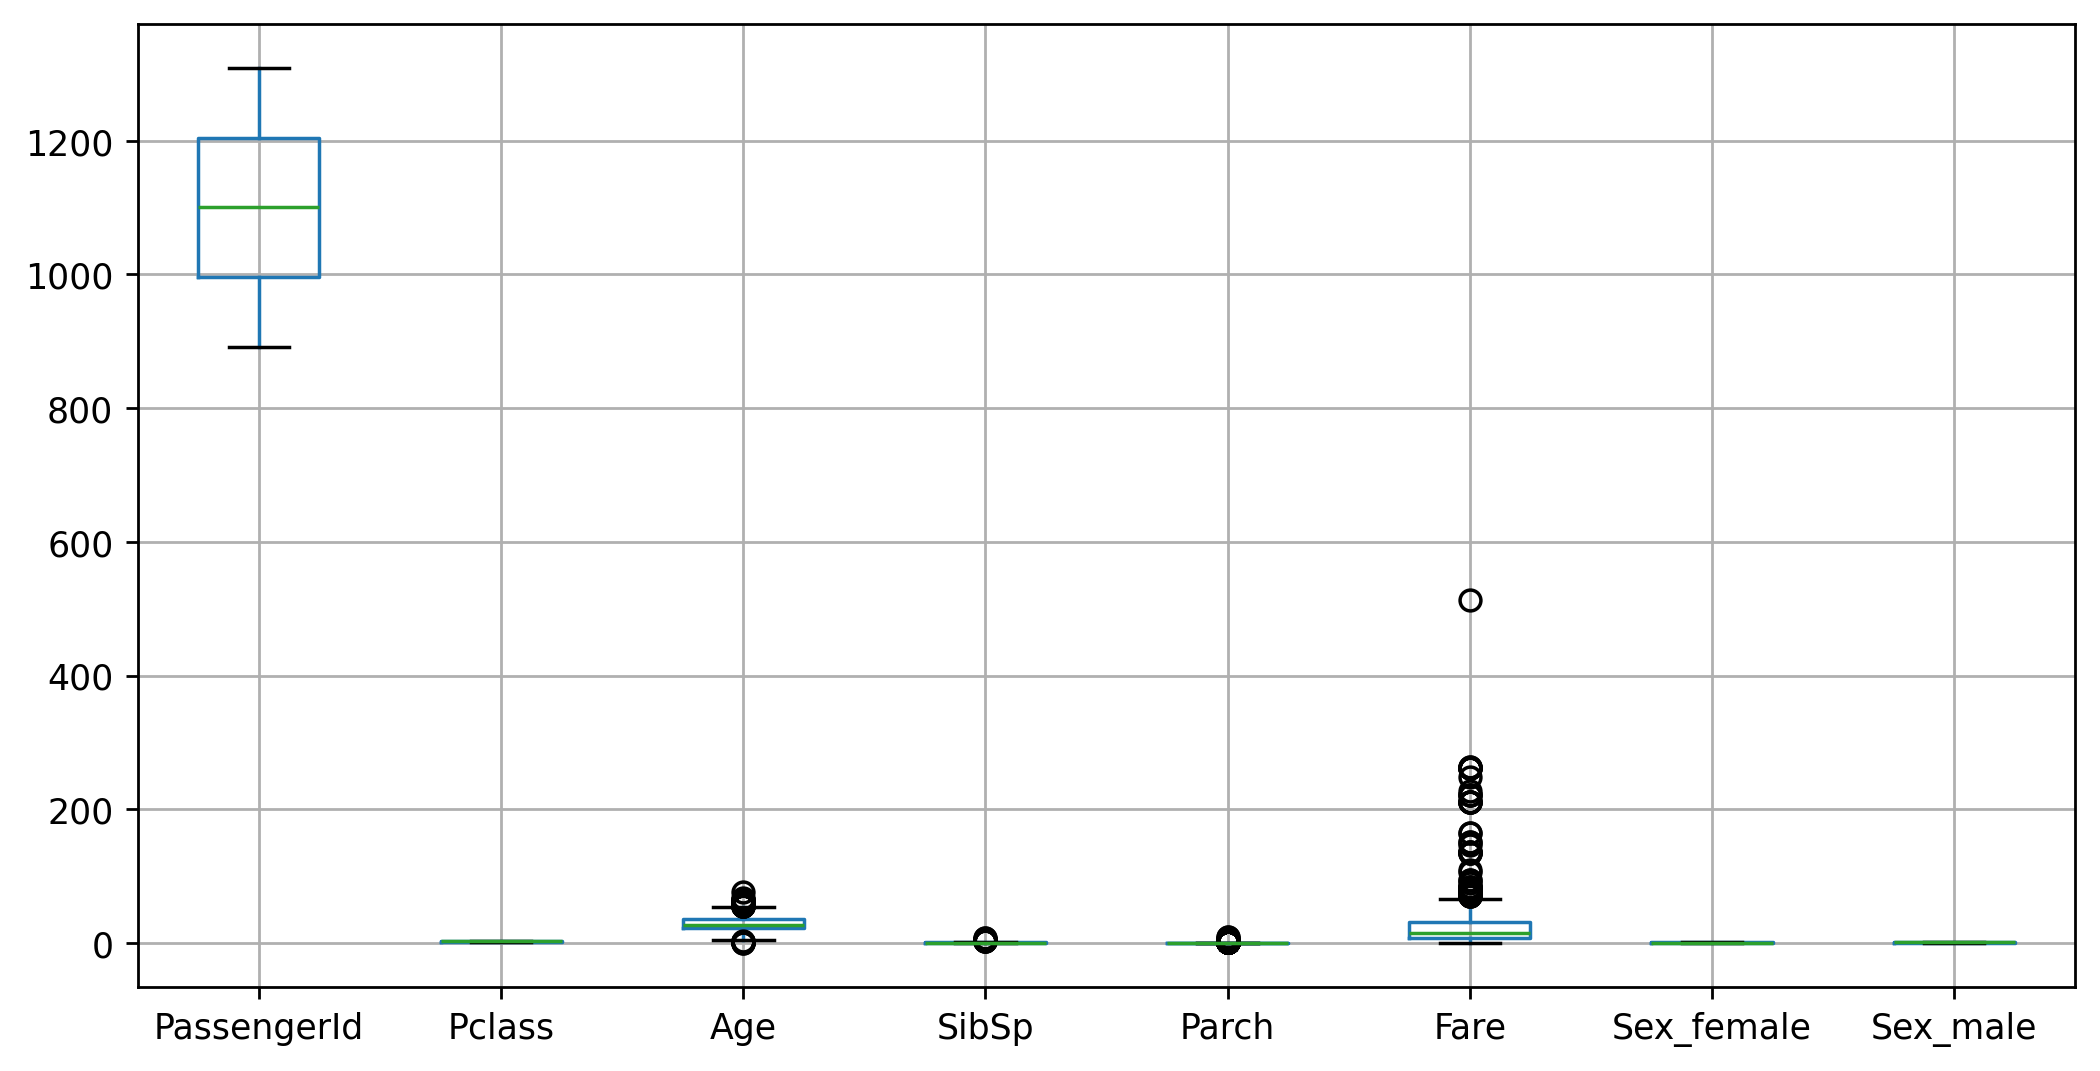

In [18]:
df.boxplot()

<Axes: >

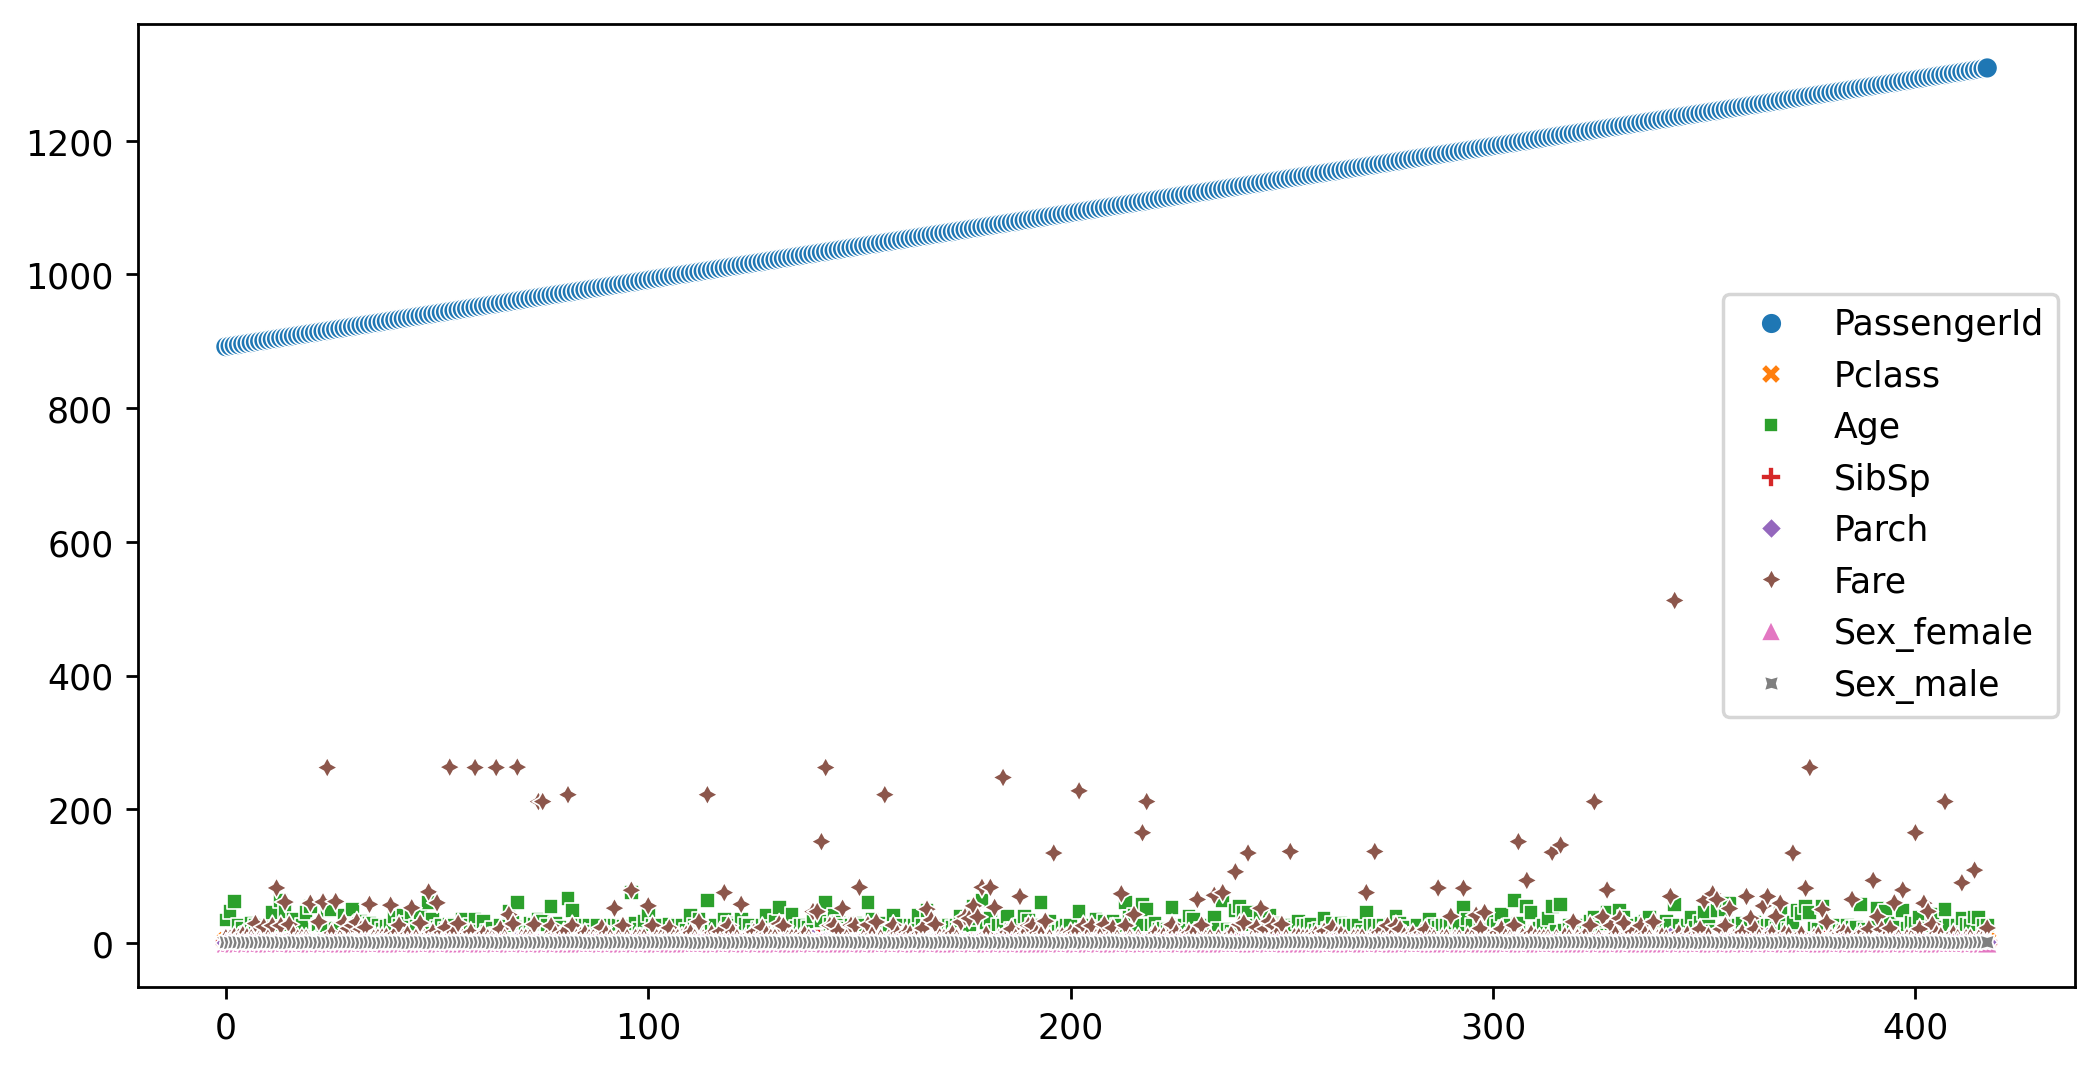

In [19]:
sns.scatterplot(df)

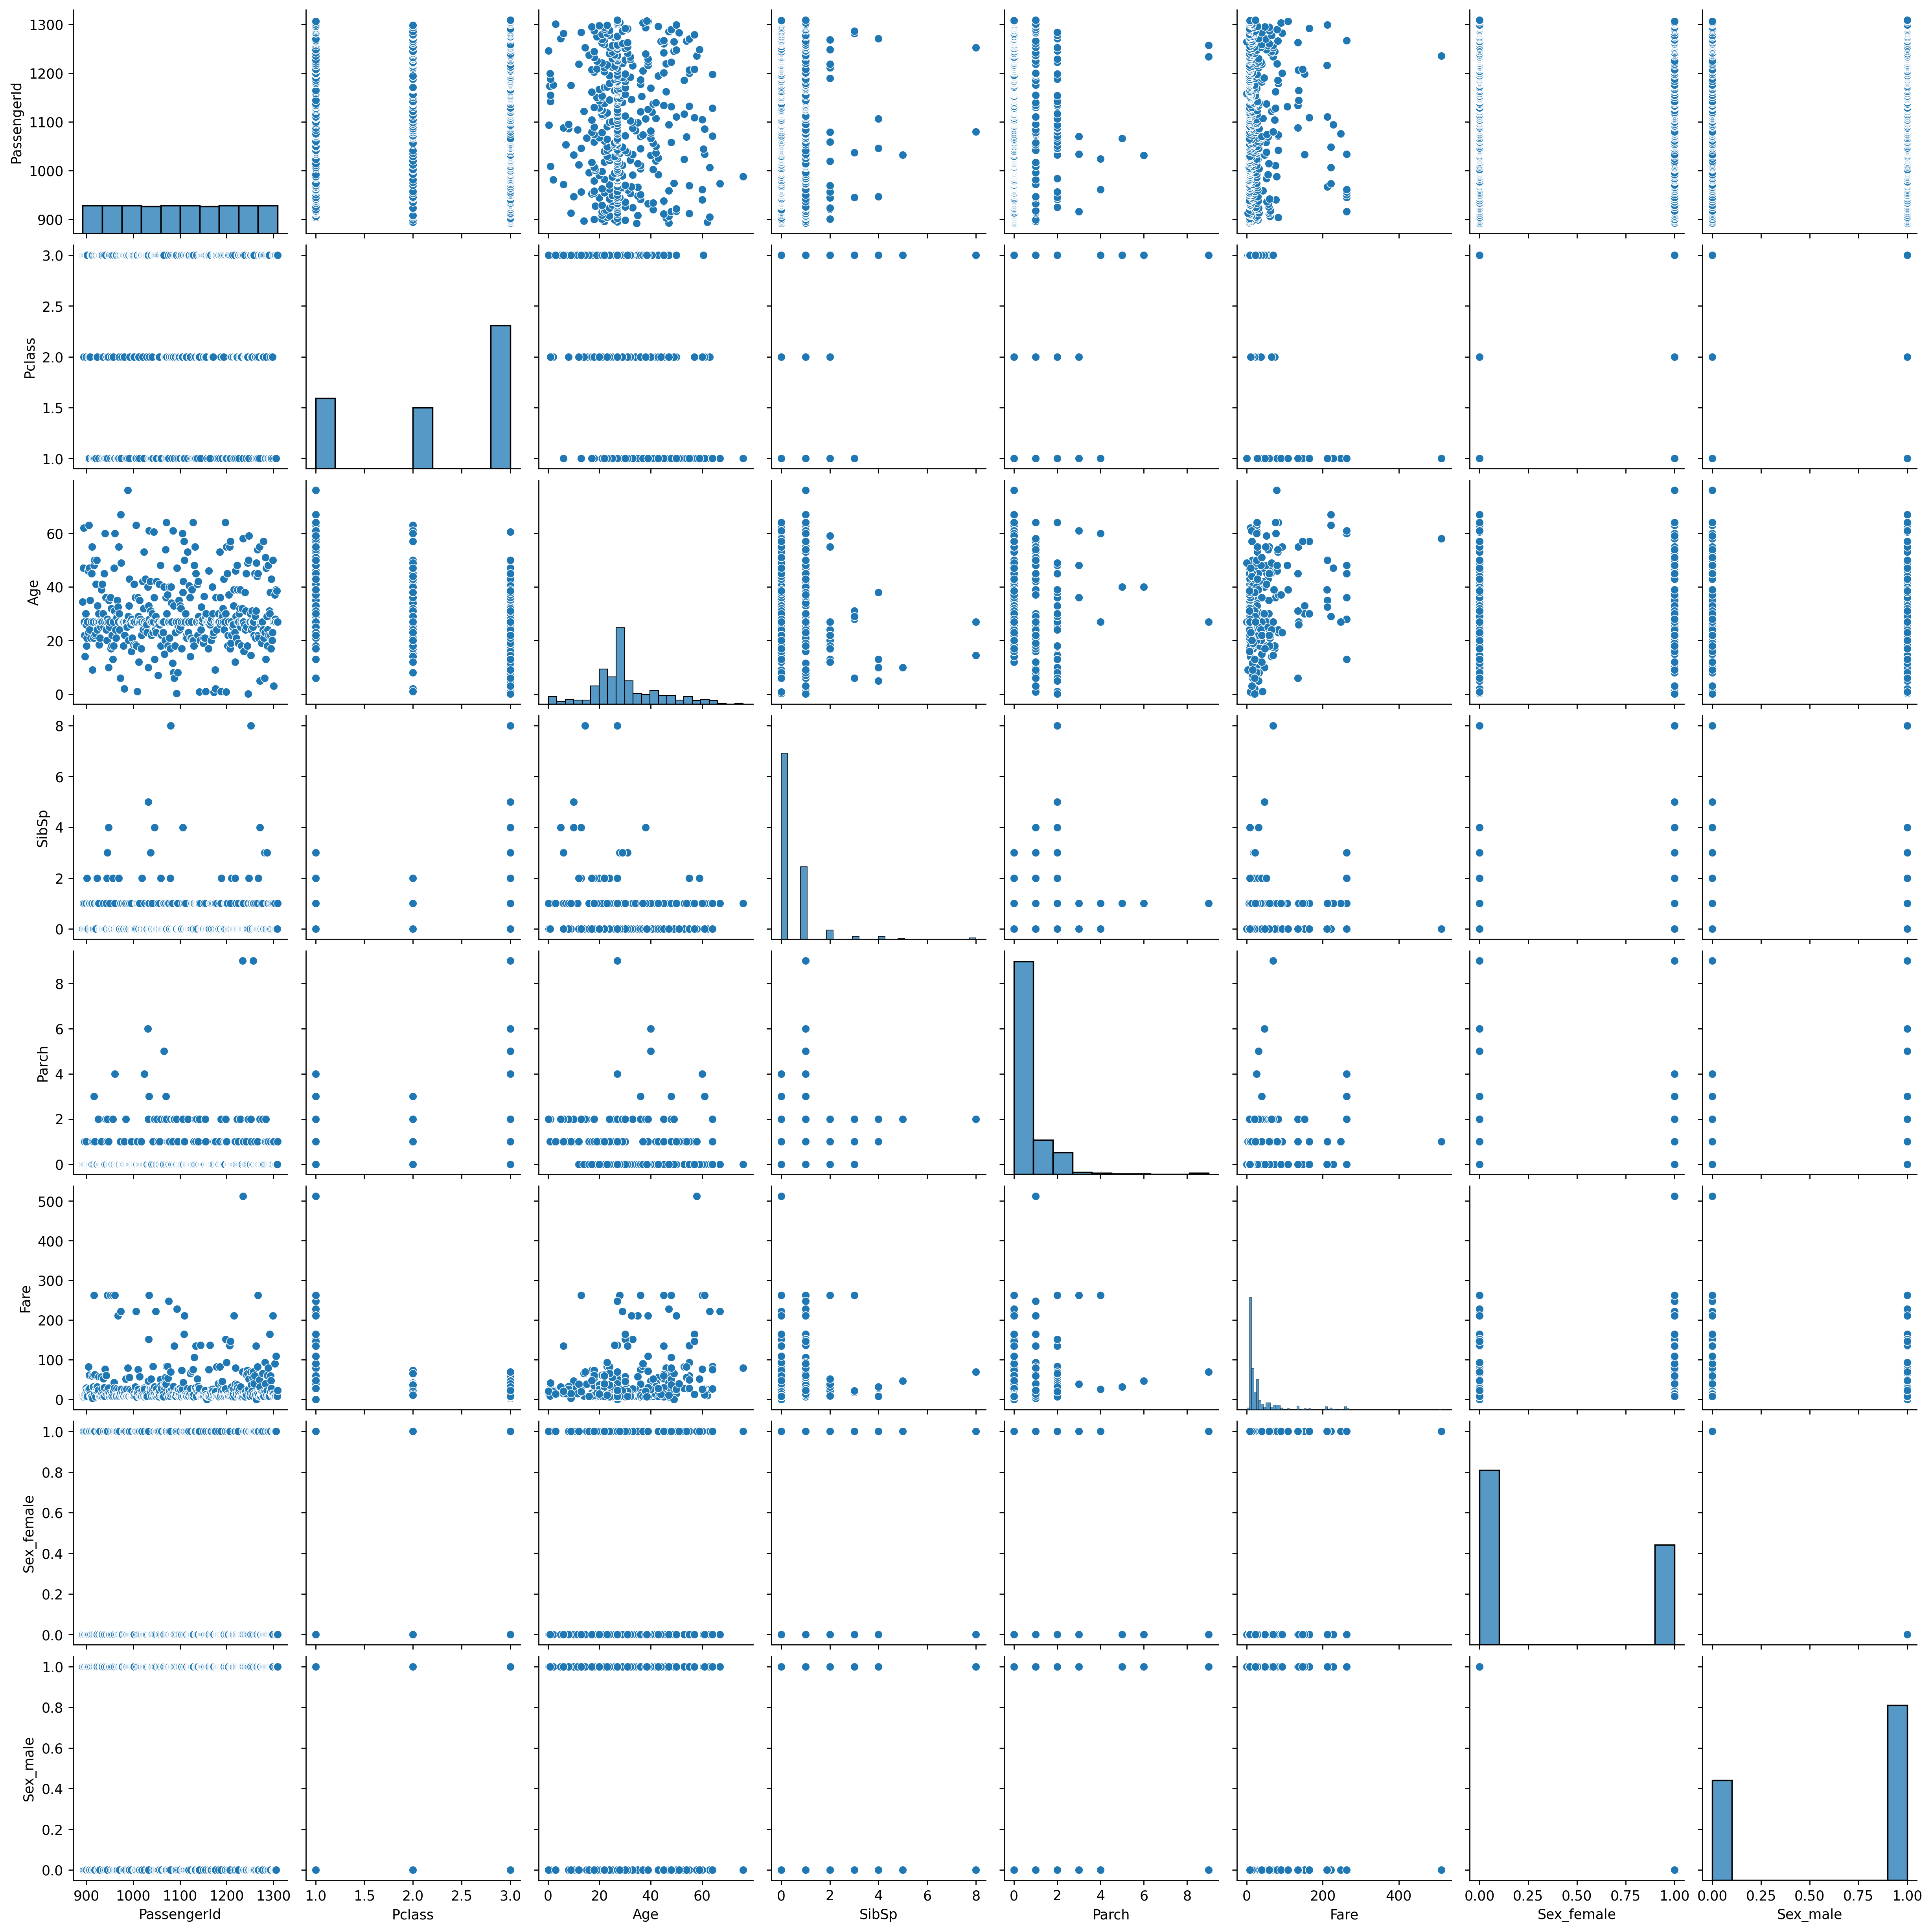

In [20]:
sns.pairplot(df)

array([[<Axes: title={'center': 'PassengerId'}>,
        <Axes: title={'center': 'Pclass'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'SibSp'}>,
        <Axes: title={'center': 'Parch'}>,
        <Axes: title={'center': 'Fare'}>],
       [<Axes: title={'center': 'Sex_female'}>,
        <Axes: title={'center': 'Sex_male'}>, <Axes: >]], dtype=object)

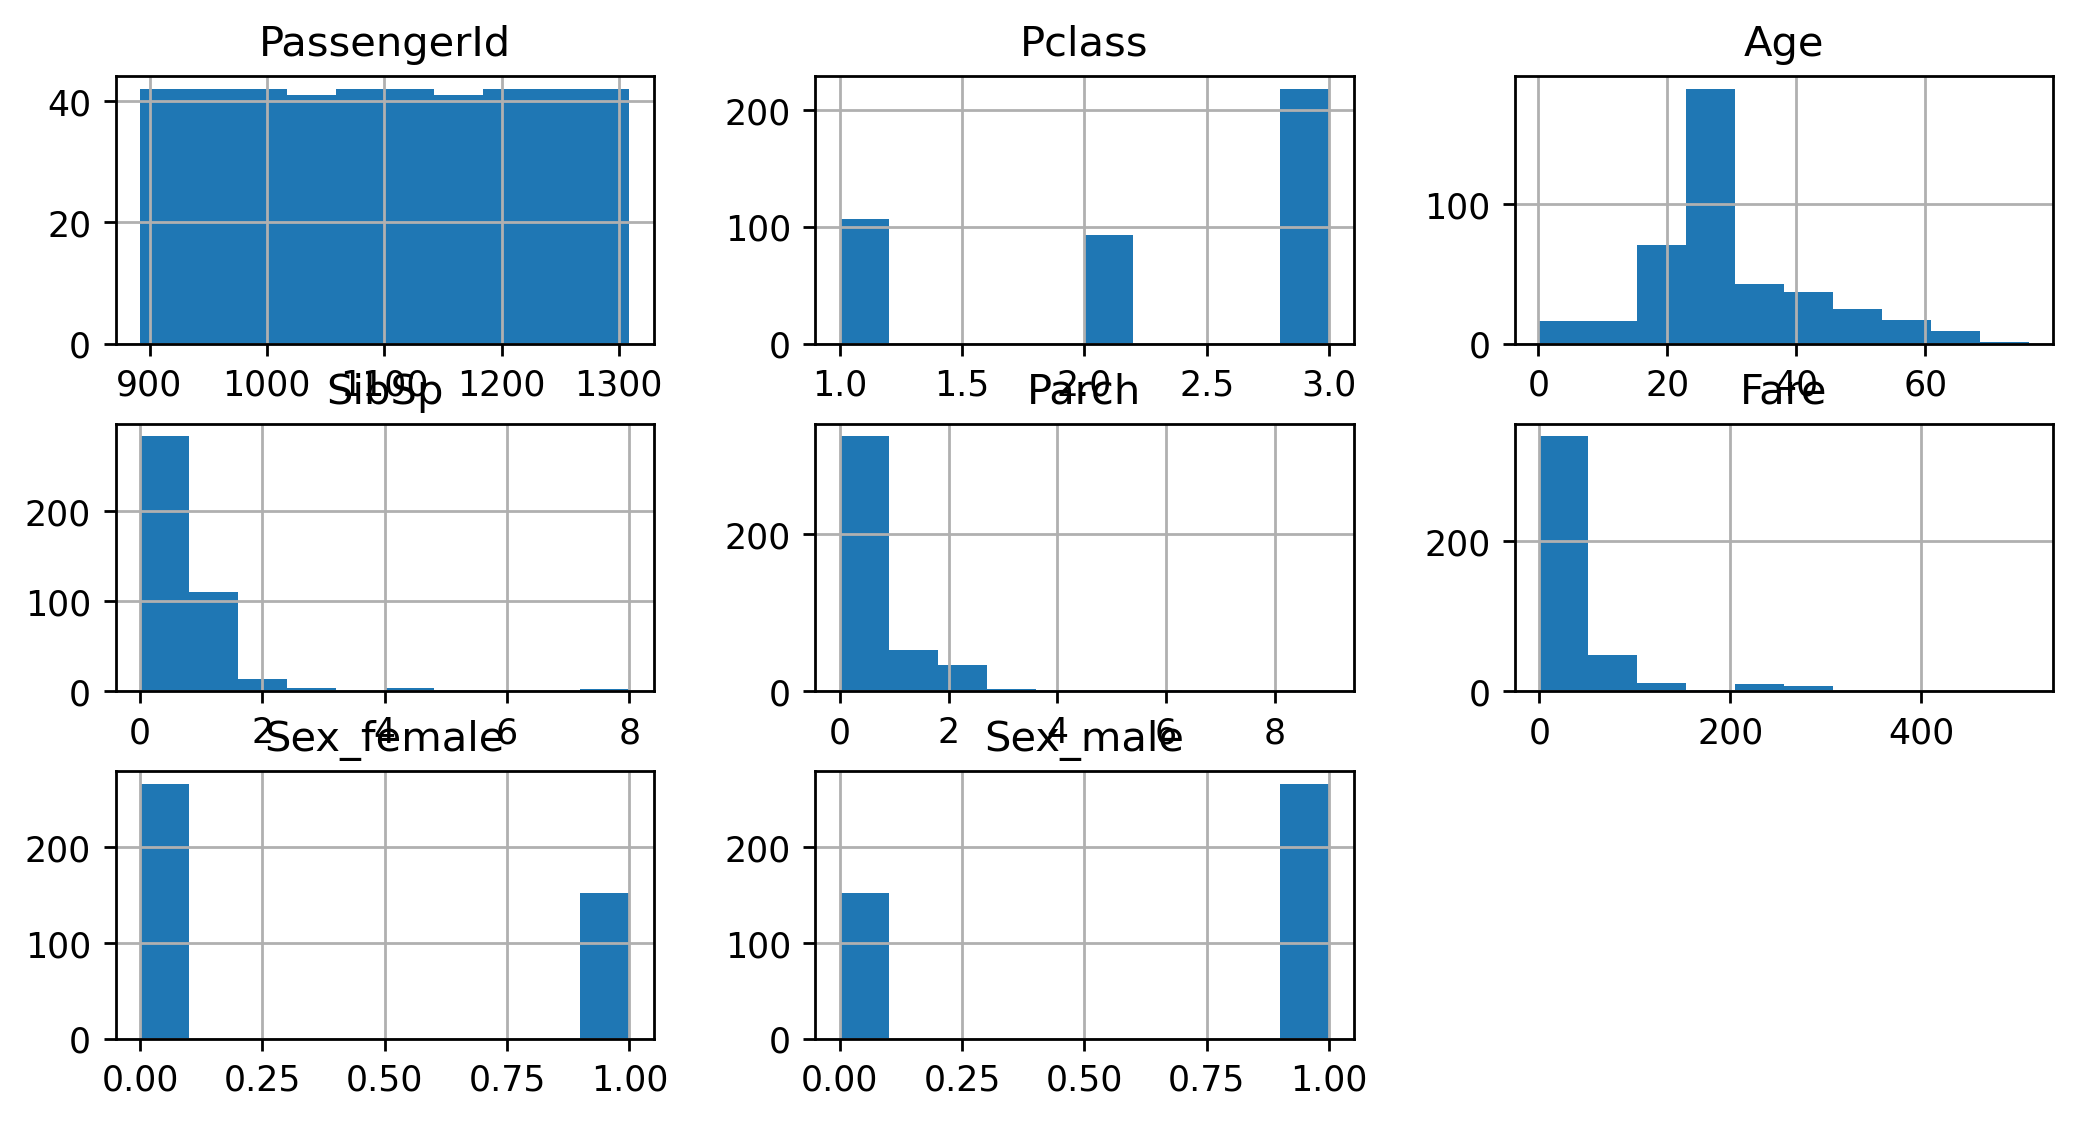

In [21]:
df.hist()

In [22]:
df.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex_female,Sex_male
0,892,3,34.5,0,0,7.8292,Q,0,1
1,893,3,47.0,1,0,7.0000,S,1,0
2,894,2,62.0,0,0,9.6875,Q,0,1
3,895,3,27.0,0,0,8.6625,S,0,1
4,896,3,22.0,1,1,12.2875,S,1,0


# Model Building

In [23]:
x = df.drop(columns=['Embarked'])          
y = df['Embarked']

In [24]:
x

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male
0,892,3,34.5,0,0,7.8292,0,1
1,893,3,47.0,1,0,7.0000,1,0
2,894,2,62.0,0,0,9.6875,0,1
3,895,3,27.0,0,0,8.6625,0,1
4,896,3,22.0,1,1,12.2875,1,0
...,...,...,...,...,...,...,...,...
413,1305,3,27.0,0,0,8.0500,0,1
414,1306,1,39.0,0,0,108.9000,1,0
415,1307,3,38.5,0,0,7.2500,0,1
416,1308,3,27.0,0,0,8.0500,0,1


In [25]:
y

0      Q
1      S
2      Q
3      S
4      S
      ..
413    S
414    C
415    S
416    S
417    C
Name: Embarked, Length: 418, dtype: object

# Splitting data

In [26]:
from sklearn.model_selection import train_test_split           #splitting data

In [27]:
train_test_split(x,y,train_size=0.8, random_state=0)

[     PassengerId  Pclass   Age  SibSp  Parch      Fare  Sex_female  Sex_male
 20           912       1  55.0      1      0   59.4000           0         1
 306         1198       1  30.0      1      2  151.5500           0         1
 142         1034       1  61.0      1      3  262.3750           0         1
 14           906       1  47.0      1      0   61.1750           1         0
 284         1176       3   2.0      1      1   20.2125           1         0
 ..           ...     ...   ...    ...    ...       ...         ...       ...
 323         1215       1  33.0      0      0   26.5500           0         1
 192         1084       3  11.5      1      1   14.5000           0         1
 117         1009       3   1.0      1      1   16.7000           1         0
 47           939       3  27.0      0      0    7.7500           0         1
 172         1064       3  23.0      1      0   13.9000           0         1
 
 [334 rows x 8 columns],
      PassengerId  Pclass   Age  SibS

In [28]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y, test_size=0.2, random_state=0)

In [29]:
xtrain

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male
20,912,1,55.0,1,0,59.4000,0,1
306,1198,1,30.0,1,2,151.5500,0,1
142,1034,1,61.0,1,3,262.3750,0,1
14,906,1,47.0,1,0,61.1750,1,0
284,1176,3,2.0,1,1,20.2125,1,0
...,...,...,...,...,...,...,...,...
323,1215,1,33.0,0,0,26.5500,0,1
192,1084,3,11.5,1,1,14.5000,0,1
117,1009,3,1.0,1,1,16.7000,1,0
47,939,3,27.0,0,0,7.7500,0,1


In [30]:
ytrain

20     C
306    S
142    C
14     S
284    S
      ..
323    S
192    S
117    S
47     Q
172    S
Name: Embarked, Length: 334, dtype: object

In [31]:
from sklearn.linear_model import LogisticRegression             #Building model

In [32]:
lg = LogisticRegression()

lg.fit(xtrain,ytrain)   

LogisticRegression()

In [33]:
xtest

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male
360,1252,3,14.5,8,2,69.5500,0,1
170,1062,3,27.0,0,0,7.5500,0,1
224,1116,1,53.0,0,0,27.4458,1,0
358,1250,3,27.0,0,0,7.7500,0,1
309,1201,3,45.0,1,0,14.1083,1,0
...,...,...,...,...,...,...,...,...
100,992,1,43.0,1,0,55.4417,1,0
7,899,2,26.0,1,1,29.0000,0,1
22,914,1,27.0,0,0,31.6833,1,0
68,960,1,31.0,0,0,28.5375,0,1


In [34]:
yp = lg.predict(xtest)
yp

array(['S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'C', 'S',
       'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S',
       'S', 'S', 'S', 'S', 'C', 'S', 'S', 'S', 'S', 'S', 'S', 'C', 'C',
       'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S',
       'Q', 'S', 'S', 'C', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S',
       'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'C', 'S', 'S', 'S', 'S',
       'S', 'S', 'S', 'S', 'S', 'S'], dtype=object)

In [35]:
len(yp)
ytest

360    S
170    S
224    C
358    Q
309    S
      ..
100    C
7      S
22     S
68     C
328    S
Name: Embarked, Length: 84, dtype: object

# Model Evaluation

In [36]:
from sklearn.metrics import classification_report

In [37]:
print(classification_report(ytest,yp))

              precision    recall  f1-score   support

           C       0.83      0.23      0.36        22
           Q       0.00      0.00      0.00         7
           S       0.69      0.96      0.80        55

    accuracy                           0.69        84
   macro avg       0.51      0.40      0.39        84
weighted avg       0.67      0.69      0.62        84

